In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#read data

df = pd.read_csv('D:\\ML project\\Used cars in KSA.csv')

# Understandig the data

In [79]:
df.head()

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491,Automatic,2018,64000
1,Chevrolet,Trailblazer,222000,Automatic,2009,20000
2,Great,Wall,0,Automatic,2022,135000
3,Ford,Fusion,178000,Automatic,2012,23000
4,Mitsubishi,Attrage,10500,Automatic,2020,32000


In [80]:
df.tail()

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
2282,BMW,7,99000,Automatic,2015,103000
2283,Ford,Expedition,33000,Automatic,2018,185000
2284,Chevrolet,Tahoe,48000,Automatic,2018,135000
2285,Chevrolet,Tahoe,50000,Automatic,2018,135000
2286,Hyundai,Sonata,76000,Automatic,2016,73000


In [81]:
df.shape

(2287, 6)

In [82]:
df.dtypes

car_brand           object
car_model           object
car_driven           int64
car_transmission    object
car_model_year       int64
car_price            int64
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_brand         2287 non-null   object
 1   car_model         2287 non-null   object
 2   car_driven        2287 non-null   int64 
 3   car_transmission  2287 non-null   object
 4   car_model_year    2287 non-null   int64 
 5   car_price         2287 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 107.3+ KB


In [84]:
df.describe()

,car_driven,car_model_year,car_price
count,2.287000e+03,2287.000000,2.287000e+03
mean,9.962084e+04,2014.229996,8.955938e+04
std,1.425457e+05,3.644710,1.046340e+06
min,0.000000e+00,1979.000000,1.230000e+02
25%,1.865200e+04,2013.000000,2.655000e+04
50%,7.118800e+04,2015.000000,5.199900e+04
75%,1.472500e+05,2017.000000,9.345000e+04
max,4.005235e+06,2022.000000,5.000000e+07


In [85]:
df.columns

Index(['car_brand', 'car_model', 'car_driven', 'car_transmission',
       'car_model_year', 'car_price'],
      dtype='object')

In [86]:
df.corr()

,car_driven,car_model_year,car_price
car_driven,1.000000,-0.495050,-0.033838
car_model_year,-0.495050,1.000000,0.028658
car_price,-0.033838,0.028658,1.000000


# Data cleaning

In [87]:
df.nunique()

car_brand            48
car_model           219
car_driven          553
car_transmission      3
car_model_year       31
car_price           262
dtype: int64

In [88]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2282    False
2283    False
2284    False
2285    False
2286    False
Length: 2287, dtype: bool

In [89]:
df['car_transmission'].unique()

array(['Automatic', 'CVT', 'Manual'], dtype=object)

In [90]:
df.isnull().sum()

car_brand           0
car_model           0
car_driven          0
car_transmission    0
car_model_year      0
car_price           0
dtype: int64

# Descriptive statistics summary

In [91]:
df['car_price'].describe()

count    2.287000e+03
mean     8.955938e+04
std      1.046340e+06
min      1.230000e+02
25%      2.655000e+04
50%      5.199900e+04
75%      9.345000e+04
max      5.000000e+07
Name: car_price, dtype: float64

# Bivariate Analysis

1- numeric analysis scatter plot

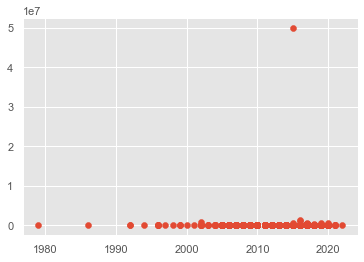

In [92]:
plt.scatter(df.car_model_year, df.car_price)
plt.show()

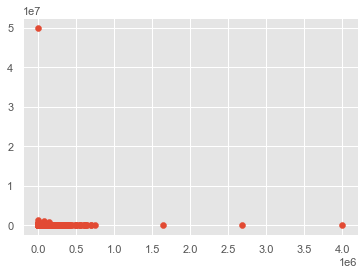

In [93]:
plt.scatter(df.car_driven , df.car_price)
plt.show()

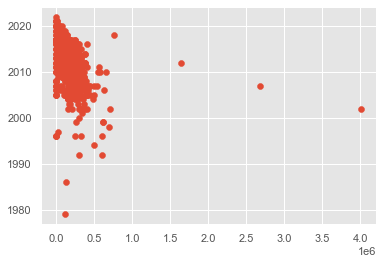

In [94]:
plt.scatter(df.car_driven ,df.car_model_year)
plt.show()

# outliers

In [95]:
#outliers
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [96]:
Q1 = df.car_model_year.quantile(0.25)
Q3 = df.car_model_year.quantile(0.75)
Q1,Q3

(2013.0, 2017.0)

In [97]:
IQR = Q3 - Q1 
IQR

4.0

In [98]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit , upper_limit

(2007.0, 2023.0)

In [99]:
df[(df.car_model_year<lower_limit) | (df.car_model_year>upper_limit)]

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
13,Toyota,Camry,410000,Automatic,2006,10000
150,Toyota,Hilux,185000,Manual,2003,37000
333,Hyundai,Accent,150000,Automatic,2005,10000
374,Hyundai,Santa,290000,Automatic,2003,10500
384,Mercedes-Benz,S-Class,300000,Automatic,2005,12500
...,...,...,...,...,...,...
2222,Toyota,Corolla,700000,CVT,2002,8500
2229,Land,Rover,250000,Automatic,2004,23000
2234,Toyota,Land,368,Manual,2006,55000
2244,Mercedes-Benz,E320,600000,Automatic,1996,10000


In [100]:
df =df [(df.car_model_year>lower_limit) & (df.car_model_year<upper_limit)]

In [101]:
Q1 = df.car_driven.quantile(0.25)
Q3 = df.car_driven.quantile(0.75)
Q1,Q3

(17110.0, 133000.0)

In [102]:
IQR = Q3 - Q1 
IQR

115890.0

In [103]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit , upper_limit

(-156725.0, 306835.0)

In [104]:
df[(df.car_driven<lower_limit) | (df.car_driven>upper_limit)]   

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
12,MG,3,325889,Automatic,2008,13000
15,Dodge,Charger,389000,Automatic,2008,15500
18,Kia,Cerato,1640000,Automatic,2012,33000
152,Hyundai,Elantra,370000,Automatic,2012,22000
154,Toyota,Corolla,400000,CVT,2016,30000
329,Toyota,Corolla,340000,CVT,2008,15000
345,Toyota,Camry,755000,Automatic,2018,62500
350,Ford,Explorer,360000,Automatic,2010,11000
361,Hyundai,Accent,380000,Automatic,2014,17000
379,Ford,Edge,349970,Automatic,2009,20500


In [105]:
df=df[(df.car_driven>lower_limit) & (df.car_driven<upper_limit)]   

In [106]:
df =df [(df.car_price>lower_limit) & (df.car_price<upper_limit)]
df

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491,Automatic,2018,64000
1,Chevrolet,Trailblazer,222000,Automatic,2009,20000
2,Great,Wall,0,Automatic,2022,135000
3,Ford,Fusion,178000,Automatic,2012,23000
4,Mitsubishi,Attrage,10500,Automatic,2020,32000
...,...,...,...,...,...,...
2282,BMW,7,99000,Automatic,2015,103000
2283,Ford,Expedition,33000,Automatic,2018,185000
2284,Chevrolet,Tahoe,48000,Automatic,2018,135000
2285,Chevrolet,Tahoe,50000,Automatic,2018,135000


# Data Visualization

<AxesSubplot:>

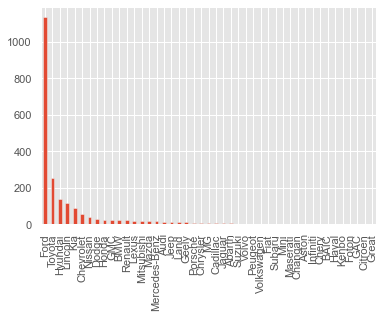

In [107]:
df['car_brand'].value_counts().plot(kind = 'bar')

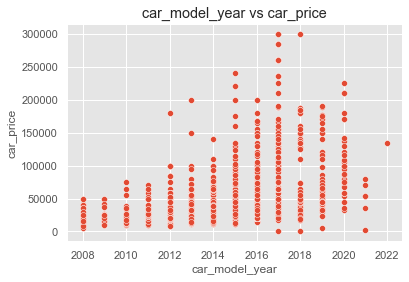

In [108]:
sns.scatterplot(x=df['car_model_year'],y=df['car_price']);
plt.title('car_model_year vs car_price');

<AxesSubplot:>

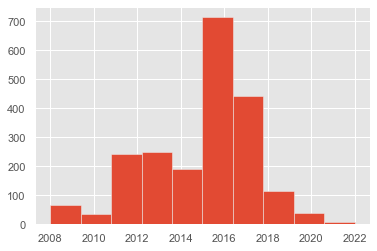

In [109]:
df.car_model_year.hist()

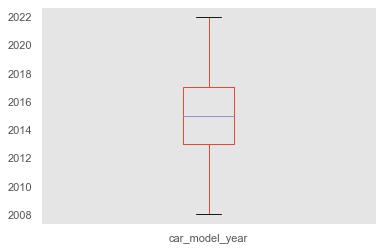

In [110]:
plot_boxplot(df,'car_model_year')

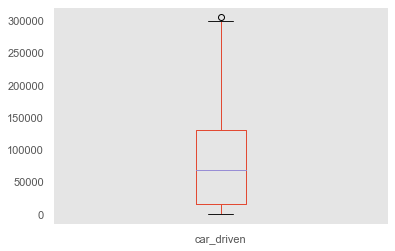

In [111]:
plot_boxplot(df,'car_driven')

In [112]:
x = df.iloc[:,[0,1,2,3,4]].values
y = df.iloc[:,[5]].values

In [113]:
#Data preprocessing 
#Label encoding to numarical features
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0] =le1.fit_transform(x[:,0])

le2=LabelEncoder()
x[:,1] =le1.fit_transform(x[:,1])

In [114]:
numerical = pd.DataFrame(df.select_dtypes(exclude=['object' , 'category']))

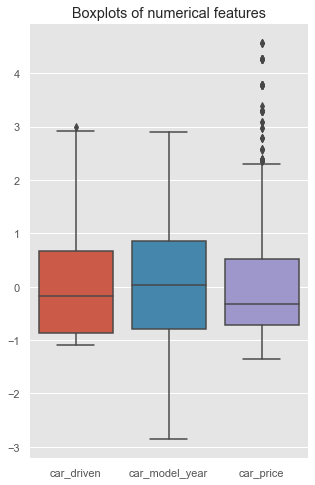

In [115]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numeric_col=ss.fit_transform(numerical)

scaled_df2=pd.DataFrame(numeric_col)
scaled_df2.columns=numerical.columns
fig, ax6 = plt.subplots(figsize=(5,8))
sns.boxplot(data=scaled_df2,ax=ax6)
plt.title('Boxplots of numerical features');

<AxesSubplot:>

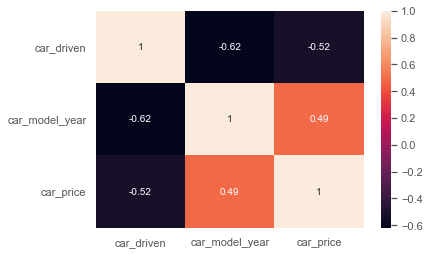

In [116]:
import seaborn as sns 
corelation = df.corr()
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels = corelation.columns , annot = True)

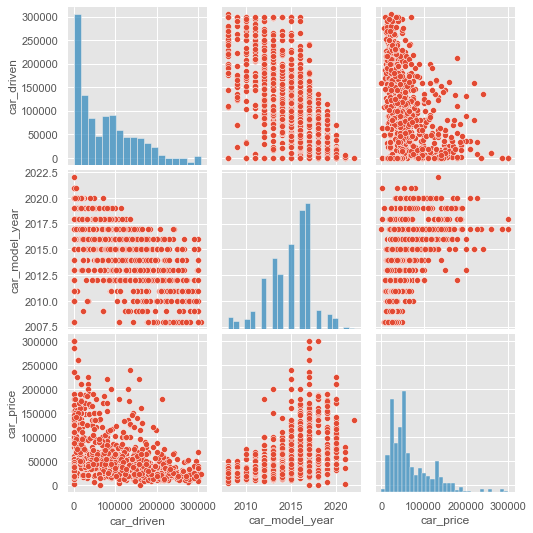

In [117]:
sns.pairplot(df)

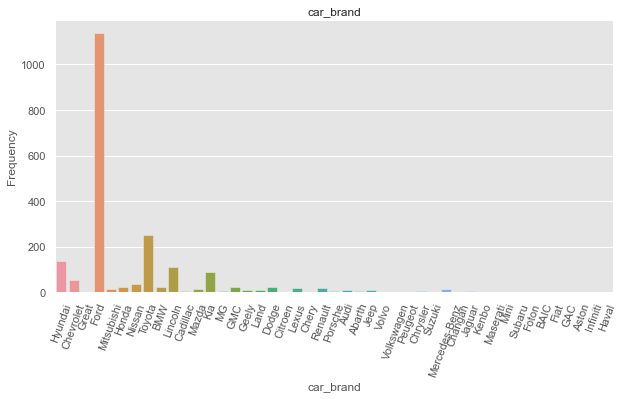

In [118]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='car_brand', data=df)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=70)
plt.title('car_brand');
plt.xlabel('car_brand');
plt.ylabel('Frequency');

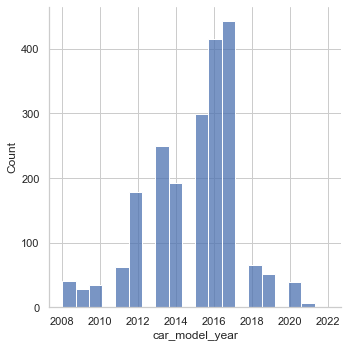

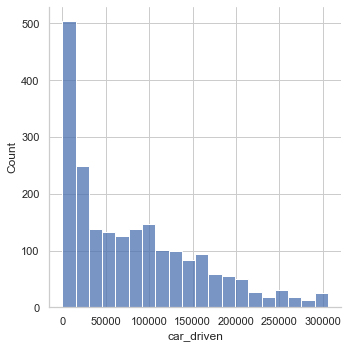

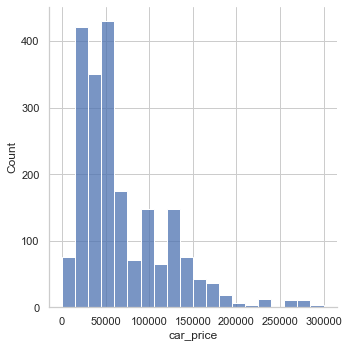

In [119]:
sns.displot(df["car_model_year"], bins = 20)
sns.displot(df['car_driven'], bins = 20)
sns.displot(df['car_price'], bins = 20) 

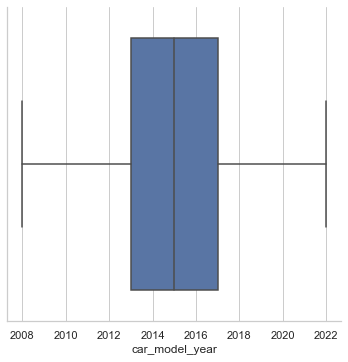

In [120]:
sns.catplot(x='car_model_year',kind='box',data=df)

<AxesSubplot:xlabel='car_price', ylabel='Density'>

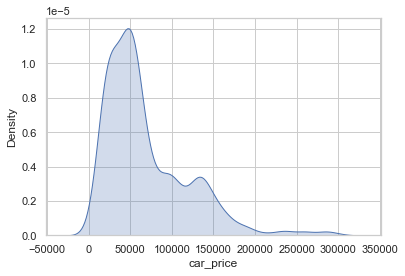

In [121]:
import seaborn as sns
sns.kdeplot(data=df['car_price'],label='price',shade=True)
#most of the value are distrebuted 20000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='car_model_year', ylabel='car_price'>

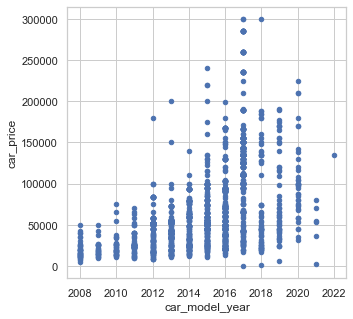

In [122]:
df.plot(kind='scatter', x='car_model_year', y='car_price', figsize=(5,5))

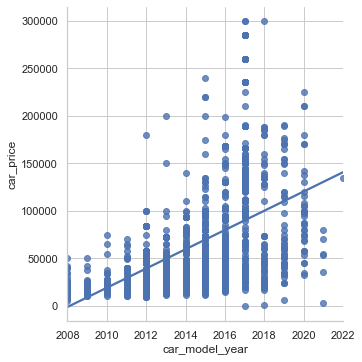

In [123]:
sns.lmplot(x ="car_model_year", y ="car_price", data = df,
                               order = 1, ci = None)

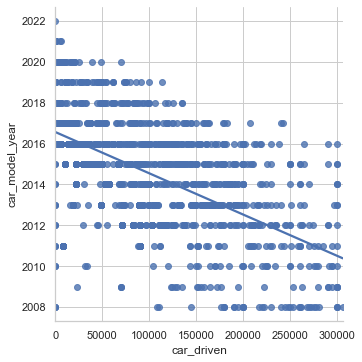

In [124]:
sns.lmplot(x ="car_driven", y ="car_model_year", data = df, order = 1, ci = None)

C:\Users\anwaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='car_driven', ylabel='car_price'>

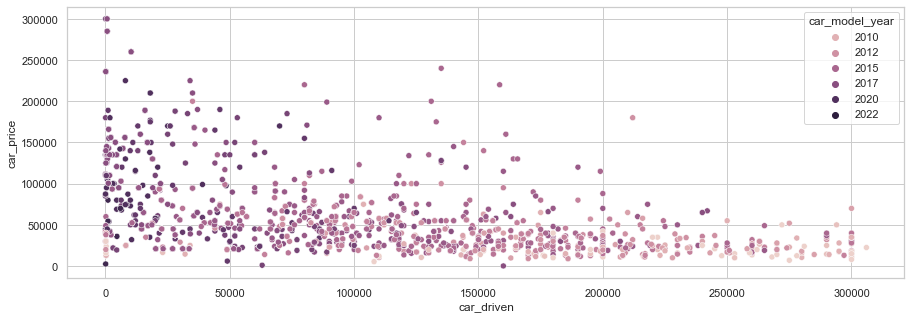

In [125]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["car_driven"], df["car_price"], hue = df["car_model_year"])

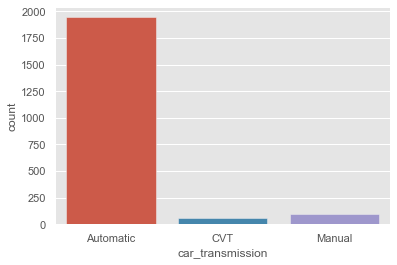

In [126]:
plt.style.use('ggplot')
sns.countplot(x='car_transmission',data=df)
plt.show()
#most of car_transmission are Automatic

C:\Users\anwaa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


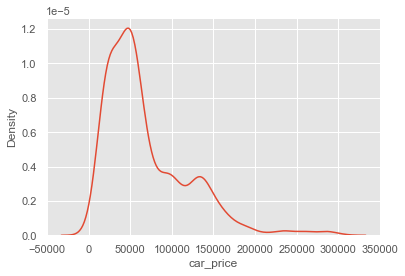

In [127]:
sns.distplot(df['car_price'],hist=False)
plt.show()

you cas see density is get high in 50000

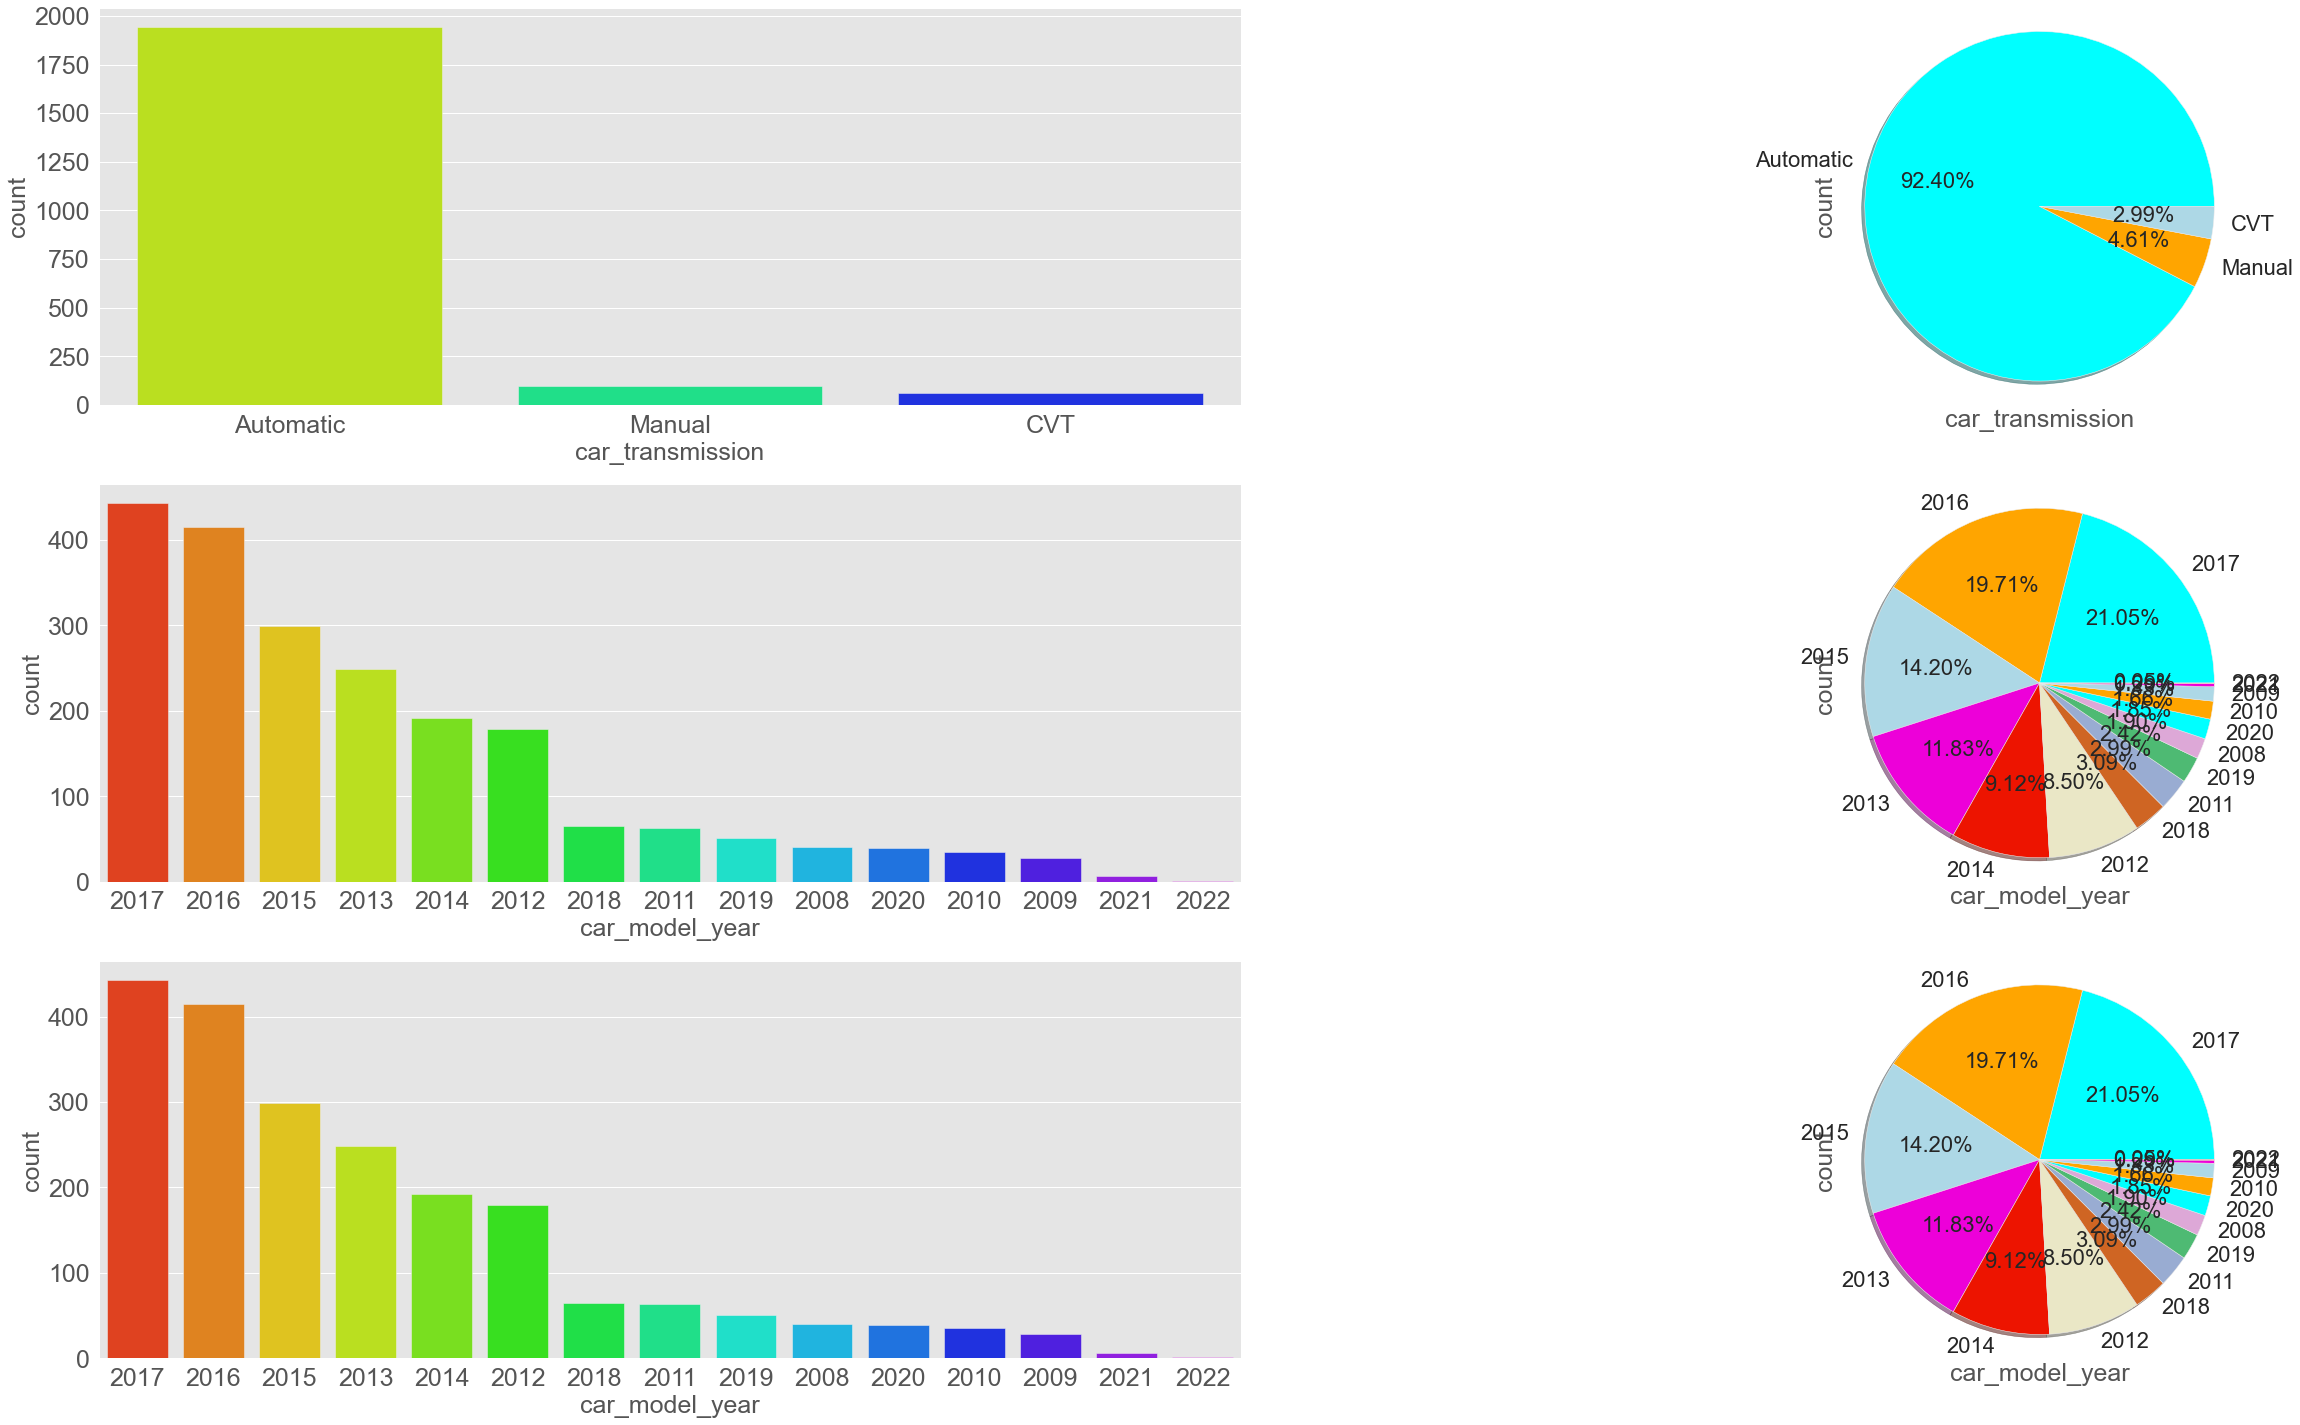

In [128]:
plot_columns=[ 'car_transmission','car_model_year','car_model_year']
colors = ["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400","#EAE7C6","#CF6523","#99ACD2","#4EBA73","#DDA8D7"]
textprops = {"fontsize":22}
i=1
plt.figure(figsize=(45,95))
for col in plot_columns:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=col,palette='gist_rainbow',order=df[col].value_counts().index)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    df[col].value_counts().plot(kind='pie',autopct='%.2f%%',
                               colors=colors,textprops=textprops,shadow=True,radius=1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
    
plt.show()

# this represent 92% of car are Automatic and most of cars model from 2017 with 21 %

In [129]:
#Check the model via the residual plot
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('car_model_year  ~ car_price', data = df).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:         car_model_year   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     655.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.42e-126
Time:                        20:17:05   Log-Likelihood:                -4573.3
No. Observations:                2105   AIC:                             9151.
Df Residuals:                    2103   BIC:                             9162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2013.3074      0.078   2.57e+04      0.0

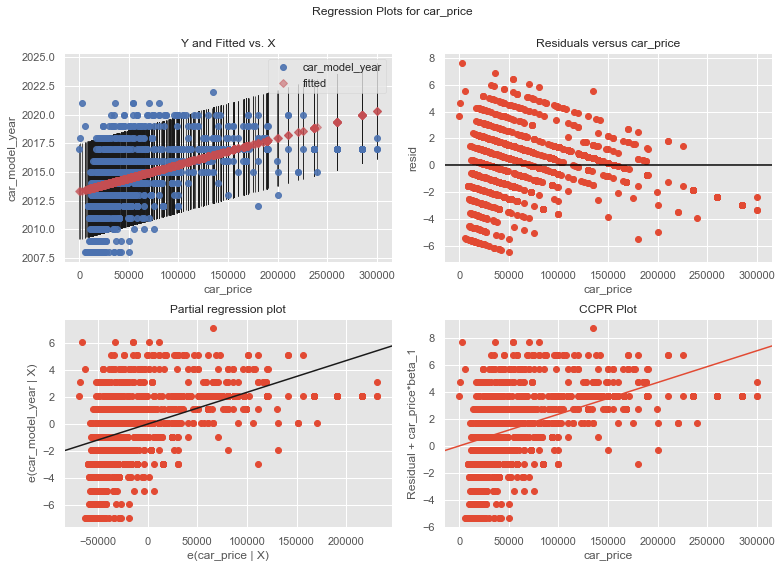

In [130]:
fig = plt.figure(figsize=(11,8))
fig = sm.graphics.plot_regress_exog(model,'car_price',fig=fig)

In [131]:
#x = newdata.iloc[:,[2,4]].values
#y = newdata.iloc[:,[5]].values

In [132]:
#Data preprocessing 
#Label encoding to numarical features
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0] =le1.fit_transform(x[:,0])

le2=LabelEncoder()
x[:,1] =le1.fit_transform(x[:,1])

# LabelEncoder

In [133]:
#Data preprocessing 
#Label encoding to numarical features
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0] =le1.fit_transform(x[:,0])

le2=LabelEncoder()
x[:,1] =le1.fit_transform(x[:,1])

In [134]:
# encoding "Fuel_Type" Column
df.replace({'car_transmission':{'Manual':0,'Automatic':1,'CVT':2}},inplace=True)

In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])],remainder='passthrough')#this one is for count every value repatedly not only 3 uniq
x=ct.fit_transform(x)

# Features Engineering

In [136]:
#add new feature
df["Current year"]=2021

In [137]:
df

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price,Current year
0,Hyundai,Tucson,83491,1,2018,64000,2021
1,Chevrolet,Trailblazer,222000,1,2009,20000,2021
2,Great,Wall,0,1,2022,135000,2021
3,Ford,Fusion,178000,1,2012,23000,2021
4,Mitsubishi,Attrage,10500,1,2020,32000,2021
...,...,...,...,...,...,...,...
2282,BMW,7,99000,1,2015,103000,2021
2283,Ford,Expedition,33000,1,2018,185000,2021
2284,Chevrolet,Tahoe,48000,1,2018,135000,2021
2285,Chevrolet,Tahoe,50000,1,2018,135000,2021


In [138]:
df["Years old"]=df["Current year"] - df["car_model_year"]

In [139]:
df

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price,Current year,Years old
0,Hyundai,Tucson,83491,1,2018,64000,2021,3
1,Chevrolet,Trailblazer,222000,1,2009,20000,2021,12
2,Great,Wall,0,1,2022,135000,2021,-1
3,Ford,Fusion,178000,1,2012,23000,2021,9
4,Mitsubishi,Attrage,10500,1,2020,32000,2021,1
...,...,...,...,...,...,...,...,...
2282,BMW,7,99000,1,2015,103000,2021,6
2283,Ford,Expedition,33000,1,2018,185000,2021,3
2284,Chevrolet,Tahoe,48000,1,2018,135000,2021,3
2285,Chevrolet,Tahoe,50000,1,2018,135000,2021,3


# drop Current year and car_model_year cols

In [140]:
df=df.drop(columns=['Current year','car_model_year'])

In [141]:
df

,car_brand,car_model,car_driven,car_transmission,car_price,Years old
0,Hyundai,Tucson,83491,1,64000,3
1,Chevrolet,Trailblazer,222000,1,20000,12
2,Great,Wall,0,1,135000,-1
3,Ford,Fusion,178000,1,23000,9
4,Mitsubishi,Attrage,10500,1,32000,1
...,...,...,...,...,...,...
2282,BMW,7,99000,1,103000,6
2283,Ford,Expedition,33000,1,185000,3
2284,Chevrolet,Tahoe,48000,1,135000,3
2285,Chevrolet,Tahoe,50000,1,135000,3


In [146]:
#Data preprocessing 
#Label encoding to numarical features
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0] =le1.fit_transform(x[:,0])

le2=LabelEncoder()
x[:,1] =le1.fit_transform(x[:,1])

In [143]:
x = df.iloc[:,[0,1,2,3,5]].values
y = df.iloc[:,[4]].values

# StandardScaler

In [147]:
#feature scaling so the ploting will be undersandable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [148]:
# encoding "Fuel_Type" Column
df.replace({'car_transmission':{'Manual':0,'Automatic':1,'CVT':2}},inplace=True)

# Modeling 

In [149]:
#splitting data into train and test 
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size = 0.3,random_state=0)

In [150]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools
from sklearn.linear_model import Lasso, LassoCV

%matplotlib inline 

In [151]:
model = XGBRegressor(random_state=2)
model.fit(x_train, y_train)
yhat2 = model.predict(x_test)

In [152]:
xgb_score = r2_score(yhat2, y_test)
print('The r^2 score for XGBRegressor is {}'.format(xgb_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat2-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat2-y_test)**2)) 

The r^2 score for XGBRegressor is 0.8986839546843662
The mean absolute error is 54159.02818050424
Residual sum of squares : 3370.0011133490816


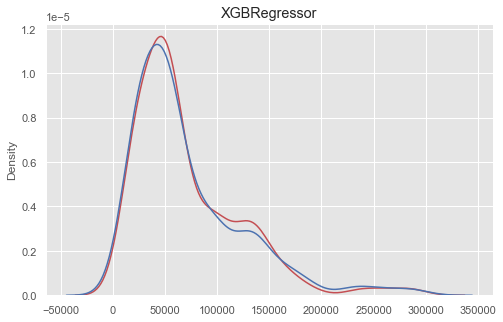

In [153]:
import matplotlib.pyplot as plt
def plot(a, title):
    plt.figure(figsize=(8, 5))
    sns.distplot(a, hist=False, color='r', label='predicted')
    sns.distplot(y_test, hist=False, color='b', label='actual')
    plt.title(title)
    plt.show()
plot(yhat2, 'XGBRegressor')

In [154]:
x = df.iloc[:,[0,1,2,3,5]].values
y = df.iloc[:,[4]].values

In [155]:
# Create model and train
def models_score(models,x_train,x_test,y_train,y_test):
    scores = {}
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        scores[name] = r2_score(y_test,y_pred)
        
        # printing the model name and accuracy
        print("Model name: ",model)
        print("R2 score : ",r2_score(y_test,y_pred))
        print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
        print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

        print("\n<<<<------------------------------------------------------------->>>>\n")
        
    model_scores = pd.DataFrame(scores, index=['R2 Score']).T
    model_scores = model_scores.sort_values('R2 Score',ascending=False)
    return model_scores

In [156]:
# Initialize the models
np.random.seed(42)
models = {"LinearRegression":LinearRegression(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(verbose=0),
         "DecisionTreeRegressor":DecisionTreeRegressor(),
         "CatBoost":CatBoostRegressor(verbose=0),
         "LightGBM":LGBMRegressor(),"lasso_model":Lasso()}

In [157]:
model_scores = models_score(models,x_train,x_test,y_train,y_test)
model_scores

Model name:  LinearRegression()
R2 score :  0.2682769358221121
Mean Absolute Error :  31919.193435360514
Mean Squared Error :  2127166601.0603325

<<<<------------------------------------------------------------->>>>

Model name:  GradientBoostingRegressor()
R2 score :  0.8476365754342436
Mean Absolute Error :  12866.349539506853
Mean Squared Error :  442930397.8870622

<<<<------------------------------------------------------------->>>>

Model name:  RandomForestRegressor()
R2 score :  0.8754380297857837
Mean Absolute Error :  8028.576830876708
Mean Squared Error :  362109759.51625603

<<<<------------------------------------------------------------->>>>

[20:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but

,R2 Score
CatBoost,0.911722
XgBoost,0.906994
LightGBM,0.881183
RandomForest,0.875438
GradiantBoost,0.847637
DecisionTreeRegressor,0.637507
lasso_model,0.268283
LinearRegression,0.268277


In [158]:
model_scores = model_scores.reset_index().rename({"index":"Models"},axis=1)
model_scores.style.bar()

,Models,R2 Score
0,CatBoost,0.911722
1,XgBoost,0.906994
2,LightGBM,0.881183
3,RandomForest,0.875438
4,GradiantBoost,0.847637
5,DecisionTreeRegressor,0.637507
6,lasso_model,0.268283
7,LinearRegression,0.268277


In [159]:
fig = px.bar(data_frame = model_scores,
             x="Models",
             y="R2 Score",
             color="Models", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

In [160]:
label = model_scores['Models']
value = model_scores['R2 Score']


fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,template='plotly_dark')


fig.show()